# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on

### Reading of the file

In [3]:
input_df = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv', sep=",", header=0)

In [4]:
input_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

### Nan

In [5]:
number_of_nan_by_row = input_df.isnull().sum(axis=1)

Description of Nan in each row  
 count    1050.000000
mean        0.324762
std         0.470539
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
dtype: float64


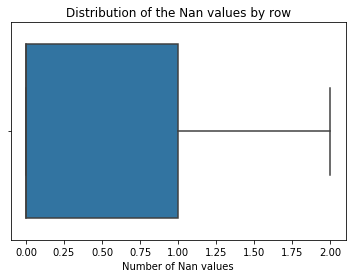

In [6]:
print("Description of Nan in each row  \n "+str(number_of_nan_by_row.describe()))
number_of_nan_by_row_df = pd.DataFrame({'Nan': number_of_nan_by_row})

bx = sns.boxplot(x='Nan', data=number_of_nan_by_row_df)
bx.set_title('Distribution of the Nan values by row')
bx.set_xlabel('Number of Nan values')
plt.show()

In [7]:
number_of_nan_by_column = input_df.isnull().sum(axis=0)

Description of Nan in each column  
 count     15.000000
mean      22.733333
std       87.216862
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max      338.000000
dtype: float64


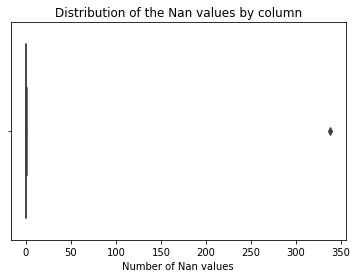

In [8]:
print("Description of Nan in each column  \n "+str(number_of_nan_by_column.describe()))
number_of_nan_by_column_df = pd.DataFrame({'Nan': number_of_nan_by_column})
bx = sns.boxplot(x='Nan', data=number_of_nan_by_column_df)
bx.set_title('Distribution of the Nan values by column')
bx.set_xlabel('Number of Nan values')
plt.show()

In [9]:
number_of_nan_by_row

0       0
1       0
2       2
3       0
4       0
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Length: 1050, dtype: int64

In [10]:
number_of_nan_by_column

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

### Numeric values

In [11]:
numeric_columns = ['retail_price', 'discounted_price']

Description of retail_price 
count      1049.000000
mean       2186.197331
std        7639.229411
min          35.000000
25%         555.000000
50%         999.000000
75%        1999.000000
max      201000.000000
Name: retail_price, dtype: float64


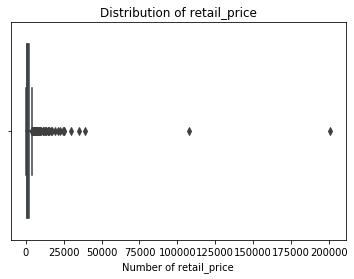

Description of discounted_price 
count      1049.000000
mean       1584.527169
std        7475.099680
min          35.000000
25%         340.000000
50%         600.000000
75%        1199.000000
max      201000.000000
Name: discounted_price, dtype: float64


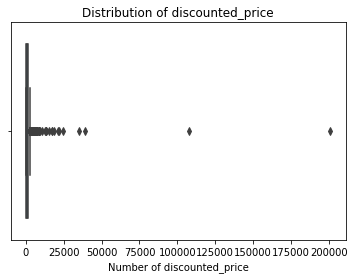

In [12]:
for element in numeric_columns:
    print("Description of "+element+" \n"+str(input_df[element].describe()))
    number__elements_df = pd.DataFrame({element: input_df[element]})
    bx = sns.boxplot(x=element, data=number__elements_df)
    bx.set_title('Distribution of '+element)
    bx.set_xlabel('Number of '+element)
    plt.show()

### Descriptive values

In [13]:
descriptive_columns = ['product_category_tree', 'is_FK_Advantage_product', 'product_rating', 'overall_rating', 'brand']

In [14]:
for element in descriptive_columns:
    print("Element: "+element+" \n")
    print(input_df[element].value_counts().index.tolist())

Element: product_category_tree 

['["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]', '["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]', '["Watches >> Wrist Watches >> Maxima Wrist Watches"]', '["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]', '["Home Furnishing >> Bath Linen >> Towels"]', '["Watches >> Wrist Watches >> Sonata Wrist Watches"]', '["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]', '["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]', '["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"]', '["Home Furnishing >> Cushions, Pillows & Covers >> Cushion Covers"]', '["Beauty and Personal Care >> Combos and Kits >> Oxyglow Combos and Kits"]', '["Watches >> Wrist Watches >> Times Wrist Watches"]', '["Home Furnishing >> Curtains & Accessories >> Curtains"]', '["Beauty and Personal Care >> Combos and Kits >> Mxofere Combos and Kits"]', '["Watches >> Wrist Watches >> Perucci Wrist Watches"]

[False, True]
Element: product_rating 

['No rating available', '5', '4', '3', '1', '4.5', '4.3', '3.5', '3.7', '2', '4.2', '4.1', '4.4', '3.6', '4.7', '2.3', '3.8', '4.8', '1.5', '3.9', '2.5', '3.2', '4.9', '2.7', '3.3', '3.1', '2.2']
Element: overall_rating 

['No rating available', '5', '4', '3', '1', '4.5', '4.3', '3.5', '3.7', '2', '4.2', '4.1', '4.4', '3.6', '4.7', '2.3', '3.8', '4.8', '1.5', '3.9', '2.5', '3.2', '4.9', '2.7', '3.3', '3.1', '2.2']
Element: brand 

['PRINT SHAPES', 'Lapguard', 'Lal Haveli', 'Aroma Comfort', 'Raymond', 'Tenda', 'Smartpro', 'Wallmantra', 'Asus', 'Home Originals', 'HP', 'AKUP', 'Edimax', 'FS Mini Klub', 'Rega IT', 'TRENDnet', 'Sapatos', 'Exotic India', 'TP-LINK', 'The Intellect Bazaar', 'Cotonex', 'Netgear', 'D-Link', 'Rajasthan Crafts', 'Offspring', 'Metallino', 'Valtellina', 'Welhouse', 'Rama', 'Tatvaarts', 'AntiqueShop', 'FURNISHINGLAND', 'JRB', 'KLIQVIK', 'Wow!', 'Fs Mini Klub', 'Digilight', 'RYTHMX', 'Zyxel', 'palito', 'Vitamins', 'Techone+', 'A

### Data cleaning

###### Product Category Tree

In [15]:
input_df['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [16]:
input_df['product_main_category'] = input_df['product_category_tree'].str.extract('\\["([a-zA-Z& ]*)>>', expand=True)

In [17]:
input_df['product_main_category']

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: product_main_category, Length: 1050, dtype: object

In [18]:
# pd.set_option('display.max_rows', input_df.shape[0]+1)

In [19]:
input_df['product_main_category']

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: product_main_category, Length: 1050, dtype: object

In [20]:
input_df['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

###### Product Name

In [21]:
input_df['product_name'] = input_df['product_name'].apply(lambda x: string.capwords(x))

In [22]:
input_df['product_name']

0       Elegance Polyester Multicolor Abstract Eyelet ...
1                              Sathiyas Cotton Bath Towel
2                     Eurospa Cotton Terry Face Towel Set
3       Santosh Royal Fashion Cotton Printed King Size...
4       Jaipur Print Cotton Floral King Sized Double B...
                              ...                        
1045       Oren Empower Extra Large Self Adhesive Sticker
1046               Wallmantra Large Vinyl Sticker Sticker
1047    Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048              Wallmantra Medium Vinyl Sticker Sticker
1049                         Uberlyfe Large Vinyl Sticker
Name: product_name, Length: 1050, dtype: object

In [23]:
input_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_main_category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,Santosh Royal Fashion Cotton Printed King Size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King Sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flip

In [24]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

###### Brand

In [25]:
input_df['product_specifications']

0       {"product_specification"=>[{"key"=>"Brand", "v...
1       {"product_specification"=>[{"key"=>"Machine Wa...
2       {"product_specification"=>[{"key"=>"Material",...
3       {"product_specification"=>[{"key"=>"Brand", "v...
4       {"product_specification"=>[{"key"=>"Machine Wa...
                              ...                        
1045    {"product_specification"=>[{"key"=>"Number of ...
1046    {"product_specification"=>[{"key"=>"Number of ...
1047    {"product_specification"=>[{"key"=>"Number of ...
1048    {"product_specification"=>[{"key"=>"Number of ...
1049    {"product_specification"=>[{"key"=>"Sales Pack...
Name: product_specifications, Length: 1050, dtype: object

In [26]:
input_df['test'] = input_df['product_specifications'].str.extract('\"Brand\", \"value\"=>\"([a-zA-Z& ]*)\"', expand=True)

In [27]:
input_df['test'].to_string()

'0                                    Elegance\n1                                    Sathiyas\n2                                     Eurospa\n3                       SANTOSH ROYAL FASHION\n4                                Jaipur Print\n5                                         NaN\n6                                         NaN\n7                                         NaN\n8                                         NaN\n9                                         NaN\n10                                        NaN\n11                                        NaN\n12                                        NaN\n13                                        NaN\n14                                        NaN\n15                                        NaN\n16                                        NaN\n17                                        NaN\n18                                        NaN\n19                                        NaN\n20                                        NaN\n21          

In [28]:
transco_description = [('Key Features of ', ''), ('Specifications of ', ''), ('Buy ', ''), ('Flipkart.com: ', ''), ('Flipkart.com is offering ', ''), ('Go ', ''), ('SF by ', ''), ('Only ', ''), ('Kool ', '')]
remove_delimiter = ['Cotton', 'Polyester', ' W', ' CAU', ' W', ' Time', ' UFT', ' WY', ' SW', ' LCS', ' AD', ' DG', ' FB', ' HF', ' PCC', ' PC', ' Pc', ' PMBA', ' PMR', ' Polo', ' DMK', ' DW', ' IW', ' Art ', ' BlackLed ', ' Combo ', ' Analog', ' TI', ' Better ', ' Friend ', ' Merry ', ' Classic ', ' Aries ', ' Believe ', ' Colorful ', ' Cute ', ' Never ', ' Eye ', ' Independence ', ' Vintage ', ' Fantasy', ' Alphabets', ' Lacto ', ' Fruit ', ' Stricker', ' Bdblue ', ' Industries ', ' Stylish ', ' Baby ', ' Premium ', ' Baby ', ' GC', ' Old', ' Lane ', ' Stainless ', ' BEST DAD', ' Gemini ', ' Night ', ' Hop ', ' Fogg ', ' Red ', ' Abstract', ' Tele ', ' Sonakshi ']
remove_delimiter = remove_delimiter + ['Monster', ' Psychological ', ' Happy ', ' Abstrcts', ' I\'m A Mom.', ' Pscychological Illusions Design', ' Beautiful', ' CMW', ' Blue', ' Pschedelic', ' Gamming', ' Cartoon', ' Graphic', ' Printed', ' EB', ' Ice Drive', ' Paris', ' RO', ' VJ', ' Smoke And', ' Compact ', ' Dynamic ', ' Get ', ' Fresh ', ' London ', ' Casual', ' La Royal ', ' Ice', ' Rage ', ' Orange', ' Drift', ' Golden', ' ST', ' Man of the Year', ' Caliber', ' New York', ' Cool', ' Deo', ' Brave', ' Gold', ' and Expedition', ' Berlin', ' Opaque ', ' School', ' NX', ' LGSWATCHES', ' GNLBBL', ' NOSWW', ' FU', ' HMTWHQ', ' SD', ' HG', ' FS', ' OLSS', ' FD', ' super fiber', ' Ultimate']
remove_delimiter = remove_delimiter + [' FIGH', ' Sticker', ' Saffron', ' RRTC', ' Print', ' Photo', 'Popfun', ' Grip ', ' Cloth', ' Natural Sciences ', ' UVSHIELD', ' Sunshield', ' Umbrella', ' Safe Sun', ' Fashion Store', ' Sweden ', ' Ultra ', ' Protect', ' Pack of', ' Navratri ', ' rk', ' Manuka', ' Lanolin', ' Bearberry', ' Trousers', ' Brillance ', ' Handcrafted']

1:201: E501 line too long (208 > 200 characters)
2:201: E501 line too long (674 > 200 characters)
3:201: E501 line too long (698 > 200 characters)
4:201: E501 line too long (372 > 200 characters)


Replace a string by another one

In [29]:
def replace_input(character):
    # character = character.str.lower()
    for k, v in enumerate(transco_description):
        character = character.str.replace(v[0], v[1])
    return (character)

Remove the characters of a string after another string

In [30]:
def remove_after(character):
    for count in remove_delimiter:
        character = character.str.split(count).str[0]
    return (character)

Select the brands that are empty

In [31]:
input_df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [32]:
nobrand_df = input_df[input_df['brand'].isnull()]

In [33]:
nobrand_df['brand_in_progress'] = replace_input(nobrand_df['description'])

In [34]:
nobrand_df['brand_in_progress'] = remove_after(nobrand_df['brand_in_progress'])

In [35]:
nobrand_df['brand_in_progress'] = nobrand_df['brand_in_progress'].str.extract('([a-zA-Z \'.]*)', expand=True)

Display the brands that are extracted for the description column

In [36]:
nobrand_df['brand_in_progress'].to_string()

"5                                               Maserati\n6                                                Camerii\n7                                                      T\n8                                                 Alfajr\n9                                              TAG Heuer\n10                                               Calibro\n11                                               Cartier\n12                                            Lois Caron\n13                                                Titan \n14                                               Srushti\n15                                              Escort E\n16                                            Jack klein\n17                                            North Moon\n18                                          Franck Bella\n19                                             Ridas Apl\n20                                                 Skmei\n21                                                Now SP\n22           

Store the results in a new column named revamped_brand

In [37]:
input_df['revamped_brand'] = input_df['brand']

In [38]:
input_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_main_category,test,revamped_brand
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Elegance,Elegance
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Sathiyas,Sathiyas
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Eurospa,Eurospa
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,Santosh Royal Fashion Cotton Printed King Size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,SANTOSH ROYAL FASHION,SANTOSH ROYAL FASHION
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King Sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Jaipur Print,Jaipur Print
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Oren Empower,Oren Empower
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Wallmantra,Wallmantra
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F.

In [39]:
input_df.loc[input_df['brand'].isnull(), ['revamped_brand']] = nobrand_df['brand_in_progress']

In [40]:
input_df['revamped_brand'] = input_df['revamped_brand'].str.lower()

###### Brands

Remove the tags value and key

In [41]:
input_df['product_specifications']

0       {"product_specification"=>[{"key"=>"Brand", "v...
1       {"product_specification"=>[{"key"=>"Machine Wa...
2       {"product_specification"=>[{"key"=>"Material",...
3       {"product_specification"=>[{"key"=>"Brand", "v...
4       {"product_specification"=>[{"key"=>"Machine Wa...
                              ...                        
1045    {"product_specification"=>[{"key"=>"Number of ...
1046    {"product_specification"=>[{"key"=>"Number of ...
1047    {"product_specification"=>[{"key"=>"Number of ...
1048    {"product_specification"=>[{"key"=>"Number of ...
1049    {"product_specification"=>[{"key"=>"Sales Pack...
Name: product_specifications, Length: 1050, dtype: object

In [42]:
input_df['clean_product_specifications'] = input_df['product_specifications'].str.replace('(?:"key"|"value|product_specification")', '')

In [43]:
input_df['clean_product_specifications']

0       {"=>[{=>"Brand", "=>"Elegance"}, {=>"Designed ...
1       {"=>[{=>"Machine Washable", "=>"Yes"}, {=>"Mat...
2       {"=>[{=>"Material", "=>"Cotton Terry"}, {=>"De...
3       {"=>[{=>"Brand", "=>"SANTOSH ROYAL FASHION"}, ...
4       {"=>[{=>"Machine Washable", "=>"Yes"}, {=>"Bra...
                              ...                        
1045    {"=>[{=>"Number of Contents in Sales Package",...
1046    {"=>[{=>"Number of Contents in Sales Package",...
1047    {"=>[{=>"Number of Contents in Sales Package",...
1048    {"=>[{=>"Number of Contents in Sales Package",...
1049    {"=>[{=>"Sales Package", "=>"Sticker"}, {=>"Br...
Name: clean_product_specifications, Length: 1050, dtype: object

Remove punctuations

In [44]:
def remove_punctuation(text):
    text = str(text)
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [45]:
input_df['titi'] = input_df['clean_product_specifications'].apply(lambda x: remove_punctuation(x))

In [46]:
input_df['titi']

0       Brand Elegance Designed For Door Type Eyelet M...
1       Machine Washable Yes Material Cotton Design Se...
2       Material Cotton Terry Design SHUVAM Brand Euro...
3       Brand SANTOSH ROYAL FASHION Machine Washable Y...
4       Machine Washable Yes Brand Jaipur Print Type F...
                              ...                        
1045    Number of Contents in Sales Package Pack of 2 ...
1046    Number of Contents in Sales Package Pack of 1 ...
1047    Number of Contents in Sales Package Pack of 1 ...
1048    Number of Contents in Sales Package Pack of 1 ...
1049    Sales Package Sticker Brand Uberlyfe Type Viny...
Name: titi, Length: 1050, dtype: object

In [47]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

Remove stopwords

In [48]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

Lemmatizer

In [49]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    lem_text = [word for word in lem_text if len(word) > 3]
    return lem_text

Clean the data

In [50]:
def cleandata(myinput):
    # Remove the punctuation
    myinput = myinput.apply(lambda x: remove_punctuation(x))
    # Instantiate Tokenizer
    # tokenizer = RegexpTokenizer(r'\w+')
    tokenizer = RegexpTokenizer(r'[a-z]*')
    # Tokenization
    myinput = myinput.apply(lambda x: tokenizer.tokenize(x.lower()))
    # Removal of the stopwords
    myinput = myinput.apply(lambda x: remove_stopwords(x))
    # Lemmatization
    myinput = myinput.apply(lambda x: word_lemmatizer(x))
    return myinput

In [51]:
input_df['test']

0                    Elegance
1                    Sathiyas
2                     Eurospa
3       SANTOSH ROYAL FASHION
4                Jaipur Print
                ...          
1045             Oren Empower
1046               Wallmantra
1047                 Uberlyfe
1048               Wallmantra
1049                 Uberlyfe
Name: test, Length: 1050, dtype: object

In [52]:
input_df['clean_product_specifications'] = cleandata(input_df['clean_product_specifications'])

In [53]:
input_df['clean_description'] = cleandata(input_df['description'])

In [54]:
input_df['clean_product_specifications']

0       [brand, elegance, designed, door, type, eyelet...
1       [machine, washable, material, cotton, design, ...
2       [material, cotton, terry, design, shuvam, bran...
3       [brand, santosh, royal, fashion, machine, wash...
4       [machine, washable, brand, jaipur, print, type...
                              ...                        
1045    [number, content, sale, package, pack, sale, p...
1046    [number, content, sale, package, pack, sale, p...
1047    [number, content, sale, package, pack, sale, p...
1048    [number, content, sale, package, pack, sale, p...
1049    [sale, package, sticker, brand, uberlyfe, type...
Name: clean_product_specifications, Length: 1050, dtype: object

Concat the brand / product specifications / clean description columns

In [55]:
input_df['clean_concat'] = input_df['revamped_brand'] + " " + input_df['clean_product_specifications'].apply(lambda x: ' '.join(x)) + " " + input_df['clean_description'].apply(lambda x: ' '.join(x))

In [56]:
input_df['clean_concat']

0       elegance brand elegance designed door type eye...
1       sathiyas machine washable material cotton desi...
2       eurospa material cotton terry design shuvam br...
3       santosh royal fashion brand santosh royal fash...
4       jaipur print machine washable brand jaipur pri...
                              ...                        
1045    oren empower number content sale package pack ...
1046    wallmantra number content sale package pack sa...
1047    uberlyfe number content sale package pack sale...
1048    wallmantra number content sale package pack sa...
1049    uberlyfe sale package sticker brand uberlyfe t...
Name: clean_concat, Length: 1050, dtype: object

### Save the dataframe

In [57]:
# Save the Dataframe in a CSV file
input_df.to_csv('./DataSet.csv', sep=',', header=True, quoting=csv.QUOTE_ALL, columns=input_df.columns.tolist(), index=False)